In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-50/NIFTY50.csv


## Import dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/nifty-50/NIFTY50.csv')
df.head()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


## Converting the DATE column into datetime 

In [5]:
df['DATE']=pd.to_datetime(df['DATE'])

## Plotting the CLOSE column

In [6]:
import plotly.express as px
fig = px.line(df, x='DATE', y='OPEN', title='NSE stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

## Set the DATE as the index column because that is need for ADF test

In [7]:
el_df=df.set_index('DATE')

## Plotting subplots

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

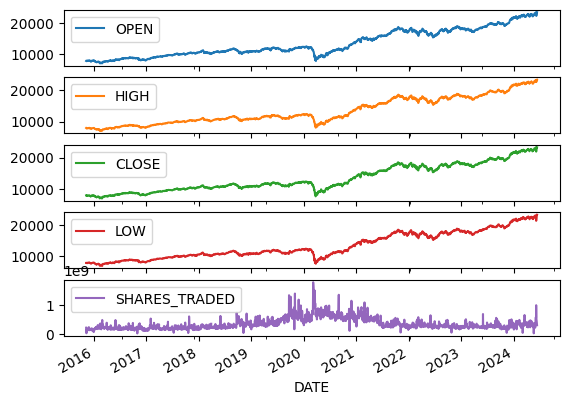

In [ ]:
el_df.plot(subplots=True)

## Checking for missing or null values

In [ ]:
print ("\nMissing values :  ", el_df.isnull().any())

## Remove missing and NULL values

In [10]:
el_df.dropna(inplace=True)

In [11]:
print ("\nMissing values :  ", el_df.isnull().any())


Missing values :   OPEN             False
HIGH             False
CLOSE            False
LOW              False
SHARES_TRADED    False
dtype: bool


In [12]:
el_df.head()

,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
DATE,,,,,
2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0


## checking stationarity

In [13]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables
coint_johansen(el_df,-1,1).eig

array([0.45457797, 0.32344217, 0.18085185, 0.02814735, 0.00356236])

## Splitting the time series dataset

In [16]:
#creating the train and validation set
train = el_df[:int(0.8*(len(el_df)))]
valid = el_df[int(0.8*(len(el_df))):]

In [17]:
train

,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
DATE,,,,,
2015-11-09,7788.25,7937.75,7915.20,7771.70,218422388.0
2015-11-10,7877.60,7885.10,7783.35,7772.85,170267413.0
2015-11-11,7838.80,7847.95,7825.00,7819.10,22380435.0
2015-11-13,7762.45,7775.10,7762.25,7730.90,165876819.0
2015-11-16,7732.95,7838.85,7806.60,7714.15,154134885.0
...,...,...,...,...,...
2022-09-21,17766.35,17838.70,17718.35,17663.60,245532498.0
2022-09-22,17609.65,17722.75,17629.80,17532.45,284094023.0
2022-09-23,17593.85,17642.15,17327.35,17291.65,390754862.0


In [18]:
valid

,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
DATE,,,,,
2022-09-28,16870.55,17037.60,16858.60,16820.40,3.239225e+08
2022-09-29,16993.60,17026.05,16818.10,16788.60,3.400344e+08
2022-09-30,16798.05,17187.10,17094.35,16747.70,3.802048e+08
2022-10-03,17102.10,17114.65,16887.35,16855.55,2.858506e+08
2022-10-04,17147.45,17287.30,17274.30,17117.30,2.316016e+08
...,...,...,...,...,...
2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08


In [23]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model_var = VAR(el_df)
model_fitted = model_var.fit(maxlags=15, ic='aic')
print(model_fitted.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Jun, 2024
Time:                     16:55:40
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    70.3738
Nobs:                     2120.00    HQIC:                   69.9000
Log likelihood:          -88564.7    FPE:                1.73138e+30
AIC:                      69.6264    Det(Omega_mle):     1.51977e+30
--------------------------------------------------------------------
Results for equation OPEN
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     3.598023         6.865142            0.524           0.600
L1.OPEN                  -0.025364         0.044654           -0.568           0.570
L1.HIGH                  -0.038160         0.

In [52]:
# Forecast future values
lag_order = model_fitted.k_ar
forecast_input = el_df.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=30)

In [53]:
# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=el_df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), columns=el_df.columns)

In [54]:
# Convert differences back to the original scale
for col in el_df.columns:
    forecast_df[col] = el_df[col].iloc[-1] + forecast_df[col].cumsum()

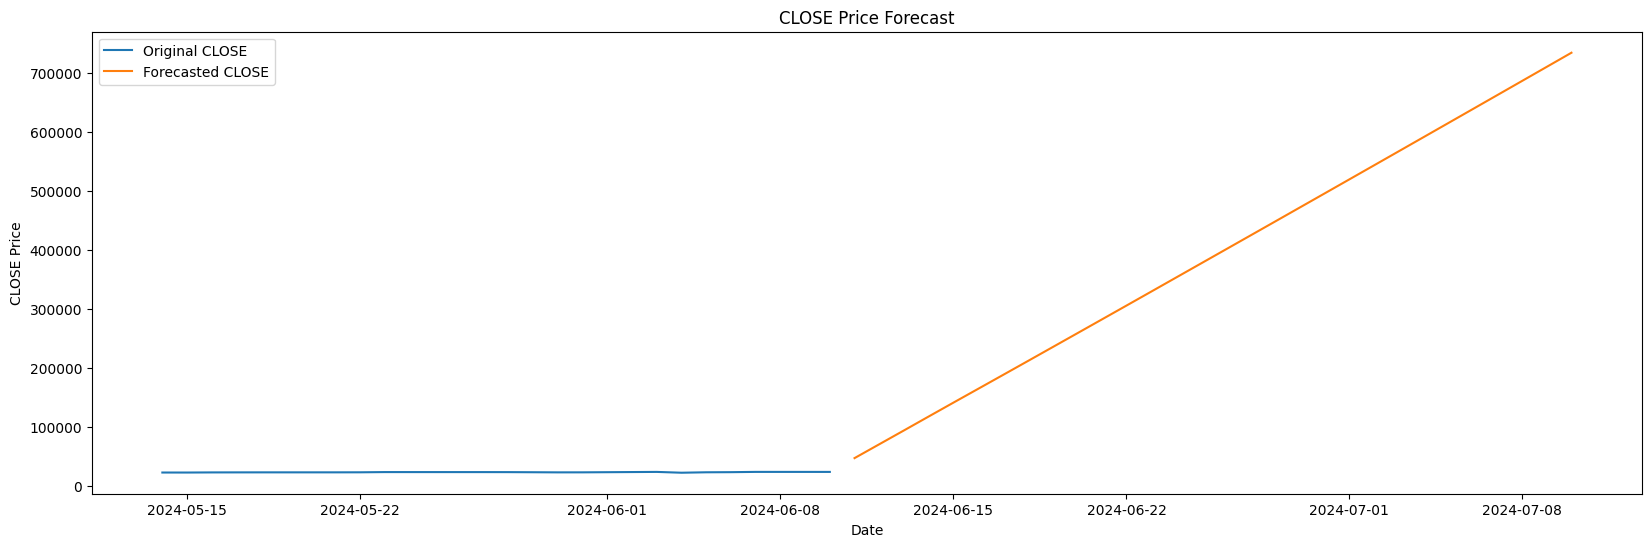

In [59]:
# Plot the results for the 'CLOSE' series
plt.figure(figsize=(20, 6))
plt.plot(el_df.tail(20).index, el_df['CLOSE'].tail(20), label='Original CLOSE')
plt.plot(forecast_df.index, forecast_df['CLOSE'], label='Forecasted CLOSE')
plt.legend()
plt.xlabel('Date')
plt.ylabel('CLOSE Price')
plt.title('CLOSE Price Forecast')
plt.show()

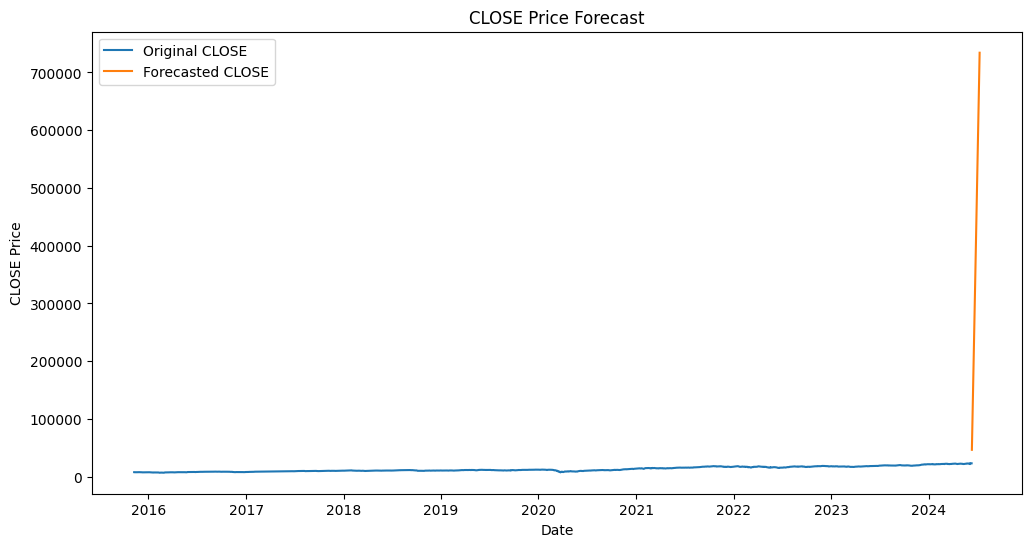

In [57]:
# Plot the results for the 'CLOSE' series
plt.figure(figsize=(12, 6))
plt.plot(el_df.index, el_df['CLOSE'], label='Original CLOSE')
plt.plot(forecast_df.index, forecast_df['CLOSE'], label='Forecasted CLOSE')
plt.legend()
plt.xlabel('Date')
plt.ylabel('CLOSE Price')
plt.title('CLOSE Price Forecast')
plt.show()

In [46]:
forecast_df = pd.DataFrame(forecast[0].values,index = test.index,columns=['Prediction'])
forecast_df

,Prediction
DATE,
2024-05-02,17069.795419
2024-05-03,17083.727406
2024-05-06,17094.595764
2024-05-07,17114.923036
2024-05-08,17095.993369
2024-05-09,17081.594402
2024-05-10,17087.263269
2024-05-13,17098.022696
2024-05-14,17112.724723


In [47]:
import matplotlib.pyplot as plt

<Axes: xlabel='DATE'>

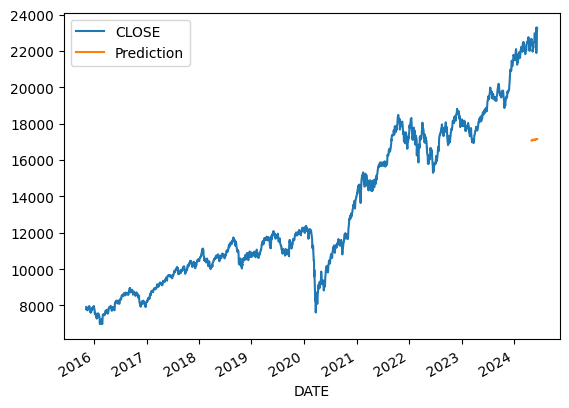

In [52]:
pd.concat([el_df['CLOSE'],forecast_df],axis=1).plot()